In [1]:
import pandas as pd
import scipy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import DataImport
import ProcessTrips

trips = ProcessTrips.transformTrips(DataImport.trips)
zones = DataImport.zones

Original number of rows: 6122322
Number of rows after removing outliers: 6122322


In [2]:
pd.options.display.float_format = '{:.2f}'.format
print(trips.describe())  

        VendorID           tpep_pickup_datetime  \
count 6122322.00                        6122322   
mean        1.60  2019-01-17 03:13:48.876795136   
min         1.00            2019-01-01 00:00:03   
25%         1.00  2019-01-09 19:03:31.249999872   
50%         2.00     2019-01-16 23:28:52.500000   
75%         2.00            2019-01-24 19:44:38   
max         4.00            2019-01-31 23:59:41   
std         0.55                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        6122322       6122322.00     6122322.00   
mean   2019-01-17 03:27:12.691109632             1.23           1.68   
min              2019-01-01 00:01:33             0.00           0.00   
25%              2019-01-09 19:15:52             1.00           0.87   
50%              2019-01-16 23:42:18             1.00           1.38   
75%              2019-01-24 19:57:18             1.00           2.20   
max              2019-01-31 23:59:59

In [3]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6122322 entries, 0 to 7667786
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date            date

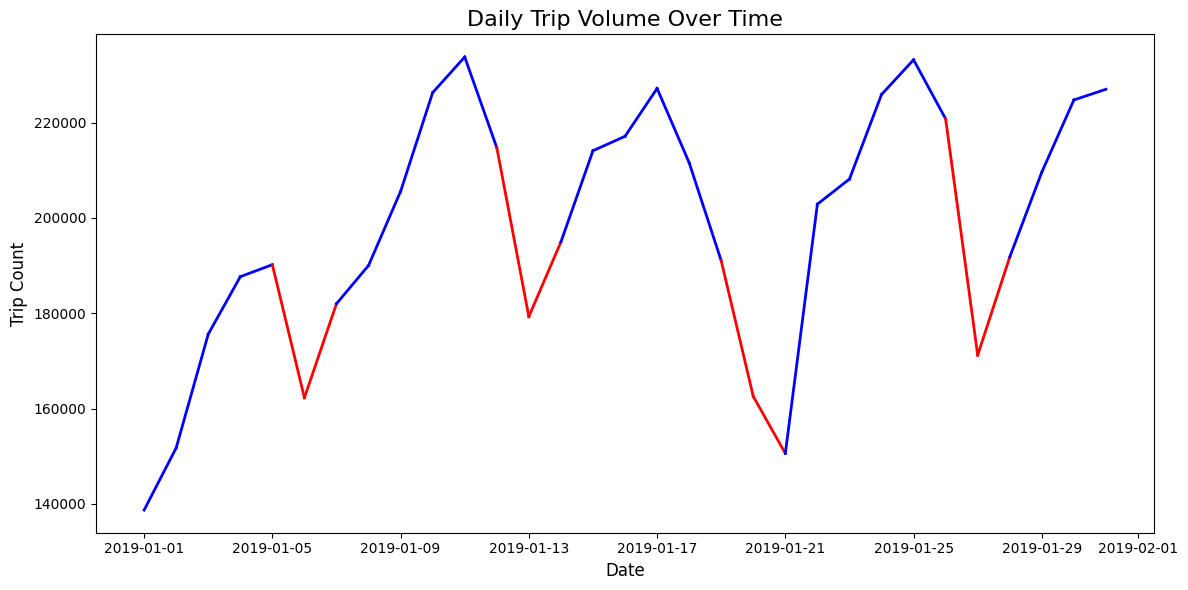

In [11]:
# Initialize a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Count trips per day
daily_trip_counts = trips.groupby('pickup_date').size()

# Loop through the daily trip data to plot segments
dates = daily_trip_counts.index
counts = daily_trip_counts.values

for i in range(len(dates) - 1):
    # Determine if the current day is a weekend
    is_weekend = dates[i].weekday() >= 5  # 5 = Saturday, 6 = Sunday
    color = 'red' if is_weekend else 'blue'  # Red for weekends, blue for weekdays

    # Plot a line segment
    ax.plot(
        [dates[i], dates[i + 1]],
        [counts[i], counts[i + 1]],
        color=color,
        linewidth=2,
    )

ax.set_title('Daily Trip Volume Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Trip Count', fontsize=12)

plt.tight_layout()
plt.show()


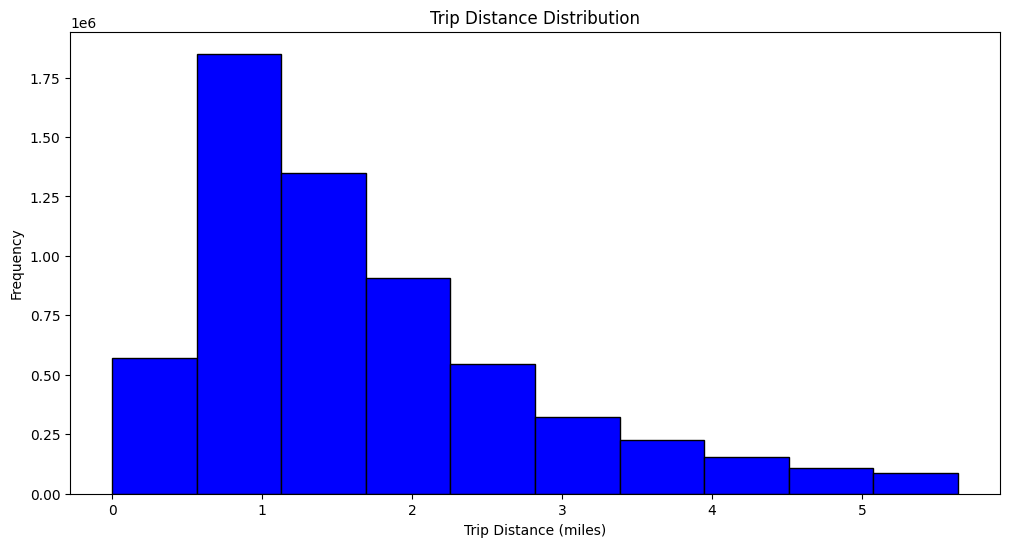

In [13]:
# Plot the histogram - trip distance distribution

trips['trip_distance'].plot(
    kind='hist', 
    #bins=20, # gali tekti pakoreguoti kai atsiras daugiau duomenu
    color='blue', 
    edgecolor='black', 
    figsize=(12, 6), 
    title='Trip Distance Distribution'
)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()


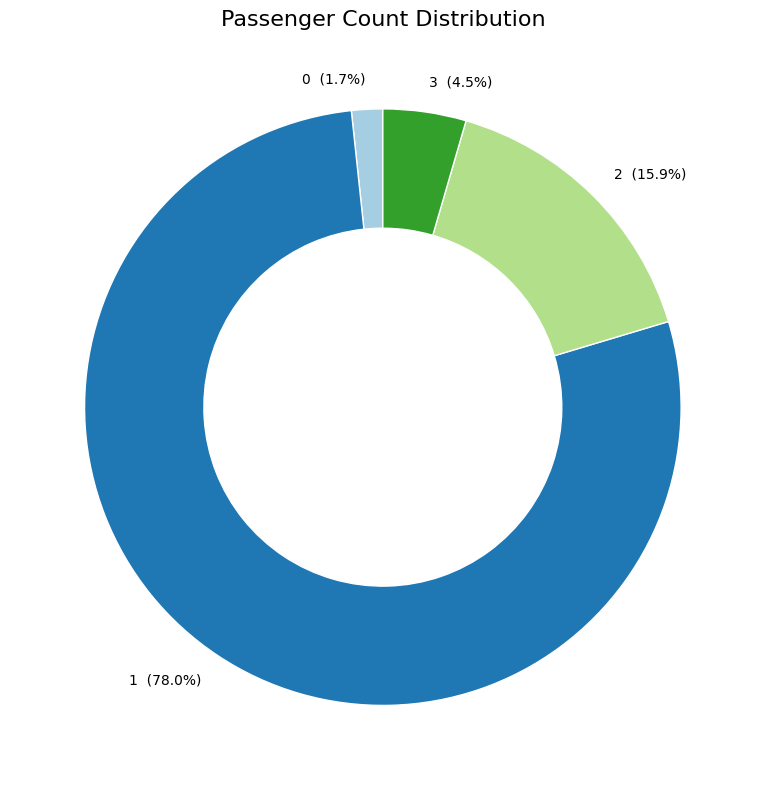

In [34]:
import matplotlib.pyplot as plt

# Calculate the passenger count distribution
passenger_distribution = trips['passenger_count'].value_counts().sort_index()

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
wedges, texts = ax.pie(
    passenger_distribution, 
    labels=[
        f"{label}  ({100 * val / sum(passenger_distribution):.1f}%)" # Format to "[count] ([%])"
        for label, val in zip(passenger_distribution.index, passenger_distribution.values)
    ],
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops=dict(width=0.4, edgecolor='w') #Apsibreziamas krastines dydis ir vidus white
)

# Add a title
plt.title('Passenger Count Distribution', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


In [3]:
TripsWithZones = ProcessTrips.MergeZones(trips, zones)
TripsWithZones.info()
print(TripsWithZones)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6122322 entries, 0 to 6122321
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date           

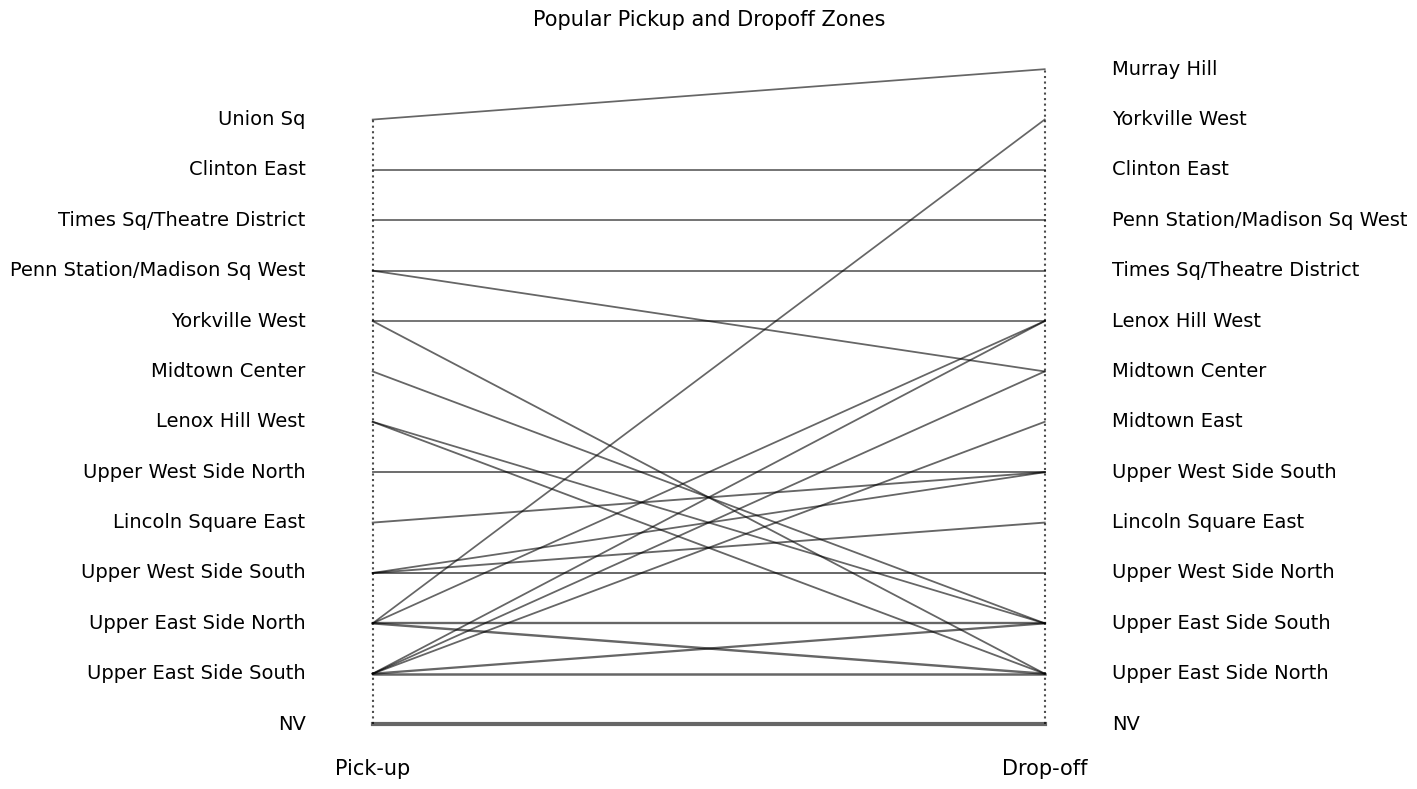

In [13]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Group data to count connections take top 50
top_connections = (
    TripsWithZones.groupby(['pickup_zone', 'dropoff_zone'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(25)
)

# Get unique pickup and dropoff zones
pickup_zones = top_connections['pickup_zone'].unique()
dropoff_zones = top_connections['dropoff_zone'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
fig.suptitle('Popular Pickup and Dropoff Zones', fontsize=15)

# Add side lines and zone labels
ax.vlines(x=1, ymin=0, ymax=len(pickup_zones) - 1, color='black', linestyles='dotted', alpha=0.7)
ax.vlines(x=3, ymin=0, ymax=len(dropoff_zones) - 1, color='black', linestyles='dotted', alpha=0.7)

for idx, zone in enumerate(pickup_zones):
    ax.text(0.8, idx, zone, ha='right', va='center', fontsize=14)
for idx, zone in enumerate(dropoff_zones):
    ax.text(3.2, idx, zone, ha='left', va='center', fontsize=14)

# Draw lines for top connections
for _, row in top_connections.iterrows():
    start_idx = list(pickup_zones).index(row['pickup_zone'])
    end_idx = list(dropoff_zones).index(row['dropoff_zone'])
    ax.add_line(mlines.Line2D(
        [1, 3], [start_idx, end_idx],
        color='black', alpha=0.6,
        linewidth=1 + 2 * (row['count'] / top_connections['count'].max())
    ))

# Clean up axes
ax.set_xlim(0, 4)
ax.set_ylim(-0.5, max(len(pickup_zones), len(dropoff_zones)) - 0.5)
ax.set_xticks([1, 3])
ax.set_xticklabels(['Pick-up', 'Drop-off'], fontsize=15)
ax.tick_params(left=False, bottom=False, labelleft=False)
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import plotly.graph_objects as go
import streamlit as st

# Group data to count connections and take top 25
top_connections = (
    TripsWithZones.groupby(['pickup_zone', 'dropoff_zone'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(25)
)

# Get unique pickup and dropoff zones
pickup_zones = top_connections['pickup_zone'].unique()
dropoff_zones = top_connections['dropoff_zone'].unique()

# Create Plotly figure
fig = go.Figure()

# Add lines for top connections with hover labels
for _, row in top_connections.iterrows():
    start_idx = list(pickup_zones).index(row['pickup_zone'])
    end_idx = list(dropoff_zones).index(row['dropoff_zone'])
    count = row['count']
    
    # Add a trace for each connection
    fig.add_trace(go.Scatter(
        x=[1, 3],
        y=[start_idx, end_idx],
        mode='lines+markers',
        line=dict(
            width=1 + 2 * (count / top_connections['count'].max()),  # Line thickness
            color='black'
        ),
        hoverinfo='text',
        text=f"{row['pickup_zone']} → {row['dropoff_zone']}<br>Trips: {count}",
        marker=dict(size=6, color='black')  # Markers at endpoints
    ))

# Add labels for pickup zones on the far left (outside the graph)
for idx, zone in enumerate(pickup_zones):
    fig.add_trace(go.Scatter(
        x=[0.7],  # Move further to the left
        y=[idx],
        mode='text',
        text=[zone],
        textposition='middle right',  # Ensure proper alignment
        hoverinfo='skip',
        showlegend=False,
        textfont=dict(size=12)
    ))

# Add labels for dropoff zones on the far right (outside the graph)
for idx, zone in enumerate(dropoff_zones):
    fig.add_trace(go.Scatter(
        x=[4],  # Move further to the right
        y=[idx],
        mode='text',
        text=[zone],
        textposition='middle left',  # Ensure proper alignment
        hoverinfo='skip',
        showlegend=False,
        textfont=dict(size=12)
    ))

# Customize the layout
fig.update_layout(
    title="Popular Pickup and Dropoff Zones",
    xaxis=dict(
        tickvals=[1, 3],
        ticktext=['Pick-up', 'Drop-off'],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False  # Hide default tick labels for clarity
    ),
    showlegend=False,
    plot_bgcolor='white',
    margin=dict(l=150, r=150)  # Add more space for labels
)

# Display in Streamlit
fig.show()


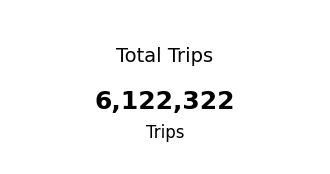

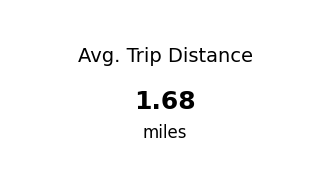

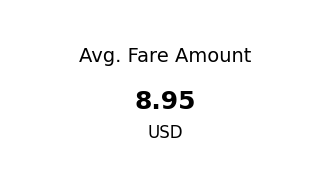

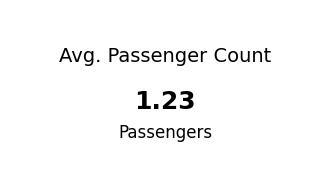

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the required metrics
total_trips = len(trips)
average_trip_distance = trips["trip_distance"].mean()
average_fare_amount = trips["fare_amount"].mean()
# most_common_payment_type = trips["payment_type"].mode()[0]
average_passenger_count = trips["passenger_count"].mean()

# Define a function to create card visuals
def create_card(title, value, unit=None, color="skyblue", is_int=False):
    fig, ax = plt.subplots(figsize=(4, 2))
    ax.set_facecolor(color)
    ax.text(0.5, 0.7, title, fontsize=14, ha="center", va="center", color="black")
    
    # Format value based on is_int
    formatted_value = f"{int(value):,}" if is_int else f"{value:,.2f}"
    ax.text(0.5, 0.4, formatted_value, 
            fontsize=18, ha="center", va="center", color="black", fontweight="bold")
    
    if unit:
        ax.text(0.5, 0.2, unit, fontsize=12, ha="center", va="center", color="black")
    ax.axis("off")
    plt.show()

#Display matrics
create_card("Total Trips", total_trips, unit="Trips", is_int=True)
create_card("Avg. Trip Distance", average_trip_distance, unit="miles")
create_card("Avg. Fare Amount", average_fare_amount, unit="USD")
# create_card("Most Common Payment", most_common_payment_type)
create_card("Avg. Passenger Count", average_passenger_count, unit="Passengers")


In [42]:
import plotly.express as px

# Create a new column for date (optional if you're filtering by specific dates)
trips['pickup_date'] = trips['tpep_pickup_datetime'].dt.date

# Filter data for the desired Y-axis attribute (e.g., weekday or specific date)
y_axis_column = 'pickup_weekday'  # Change this to 'pickup_date' for dates

# Aggregate data
heatmap_data = trips.groupby([y_axis_column, 'pickup_hour']).size().reset_index(name='trip_count')

# Plot interactive heatmap
fig = px.density_heatmap(
    heatmap_data,
    x='pickup_hour',
    y=y_axis_column,
    z='trip_count',
    color_continuous_scale='YlGnBu',
    labels={'pickup_hour': 'Hour of Day', y_axis_column: 'Y-Axis', 'trip_count': 'Trip Count'},
    title="Interactive Heatmap (Pickup Time vs Y-Axis)"
)

# Add interactive dropdown for Y-axis (weekdays or specific dates)
fig.update_layout(
    yaxis=dict(title="Y-Axis", type='category'),
    xaxis=dict(title="Hour of Day")
)

fig.show()


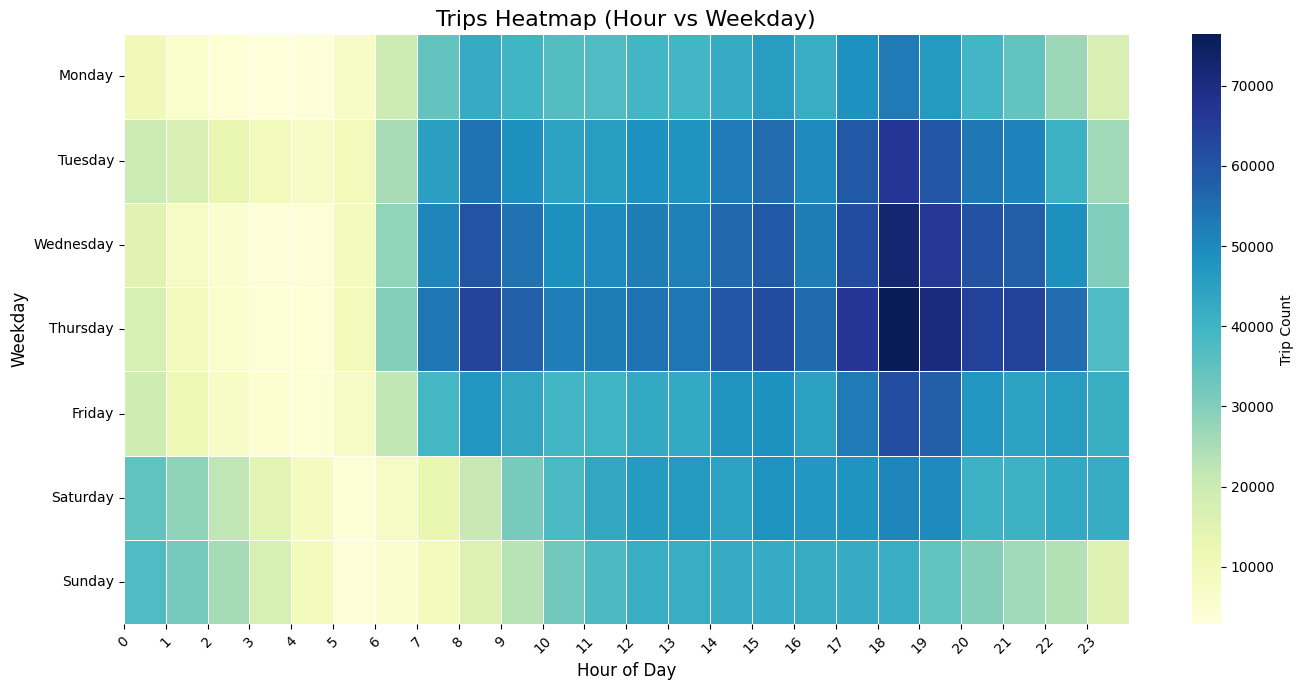

In [48]:
# Aggregate data to get counts for each hour-weekday pair
heatmap_data = trips.groupby(['pickup_weekday', 'pickup_hour']).size().reset_index(name='trip_count')

# Pivot the data for heatmap
heatmap_pivot = heatmap_data.pivot(index="pickup_weekday", columns="pickup_hour", values="trip_count")

# Reorder weekdays to start from Monday
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot.reindex(weekdays_order).fillna(0)

# Ensure X-axis includes all hours (0-23)
hour_range = list(range(24))
heatmap_pivot = heatmap_pivot.reindex(columns=hour_range, fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_pivot, cmap="YlGnBu", linewidths=.5, annot=False, fmt='d', cbar_kws={'label': 'Trip Count'})
plt.title("Trips Heatmap (Hour vs Weekday)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Weekday", fontsize=12)
plt.xticks(ticks=range(24), labels=hour_range, rotation=45)  # Explicitly set all hours on X-axis
plt.yticks(rotation=0)  # Keep Y-axis labels horizontal
plt.tight_layout()
plt.show()
